# Kaggle competition: Titanic 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
pwd

'/home/pinkmonkey/Documents/Kaggle_competitions'

In [4]:
train_data = pd.read_csv("/home/pinkmonkey/Downloads/Titanic_project/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/home/pinkmonkey/Downloads/Titanic_project/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [7]:
train_data.count()
#train_data.count().tolist()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
#train_data.Embarked.unique()
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

### K-fold cross-validation feature 

In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [58]:
scores = cross_val_score(model, X, y,
scoring="neg_mean_squared_error", cv=10)
RandomF_rmse_scores = np.sqrt(-scores)

In [59]:
display_scores(RandomF_rmse_scores)

Scores: [0.4472136  0.43704832 0.47404546 0.38218767 0.38218767 0.46204236
 0.43704832 0.48575205 0.41053541 0.46204236]
Mean: 0.4380103238381731
Standard deviation: 0.03436079272000656


In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
predictions = model.predict(X)
predictions.shape

(891,)

### Feature importance

In [36]:
model.feature_importances_

array([0.21550768, 0.07712207, 0.08040609, 0.34229736, 0.2846668 ])

### RMSE Baseline Model 

In [39]:
rfc_mse = mean_squared_error(y, predictions)
rfc_rmse = np.sqrt(rfc_mse)
rfc_rmse, rfc_mse

(0.42902546629485455, 0.1840628507295174)

In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [51]:
dummies = pd.get_dummies(train_data[['Sex', 'Embarked']], drop_first=True)
train_data1 = pd.concat([train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'],axis=1), dummies],axis=1)

In [55]:
imputer.fit(train_data1)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [60]:
X = imputer.transform(train_data1)

In [65]:
train_data_tr = pd.DataFrame(X, columns=train_data1.columns,
index=train_data1.index)

In [67]:
train_data_tr.count()

PassengerId    891
Survived       891
Pclass         891
Age            891
SibSp          891
Parch          891
Fare           891
Sex_male       891
Embarked_Q     891
Embarked_S     891
dtype: int64

In [68]:
# median = train_data1["Age"].median() # option 3
# train_data1["Age"].fillna(median, inplace=True)

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

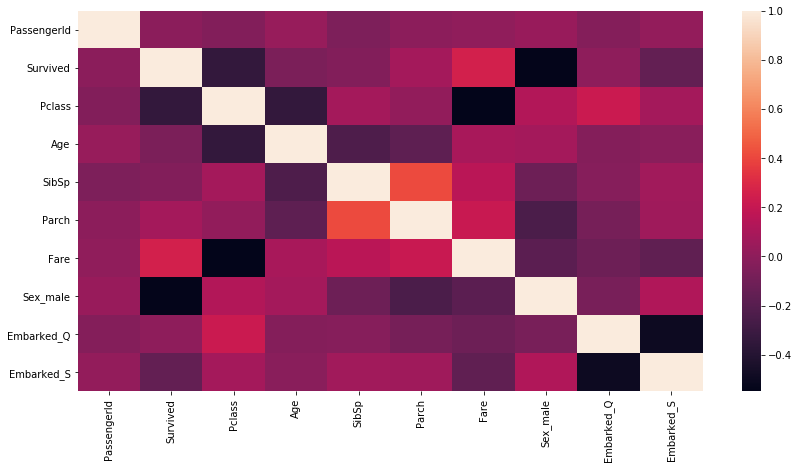

In [70]:
fig, ax = plt.subplots(figsize=(14, 7))
ax = sns.heatmap(train_data_tr.corr())#cbar=False)

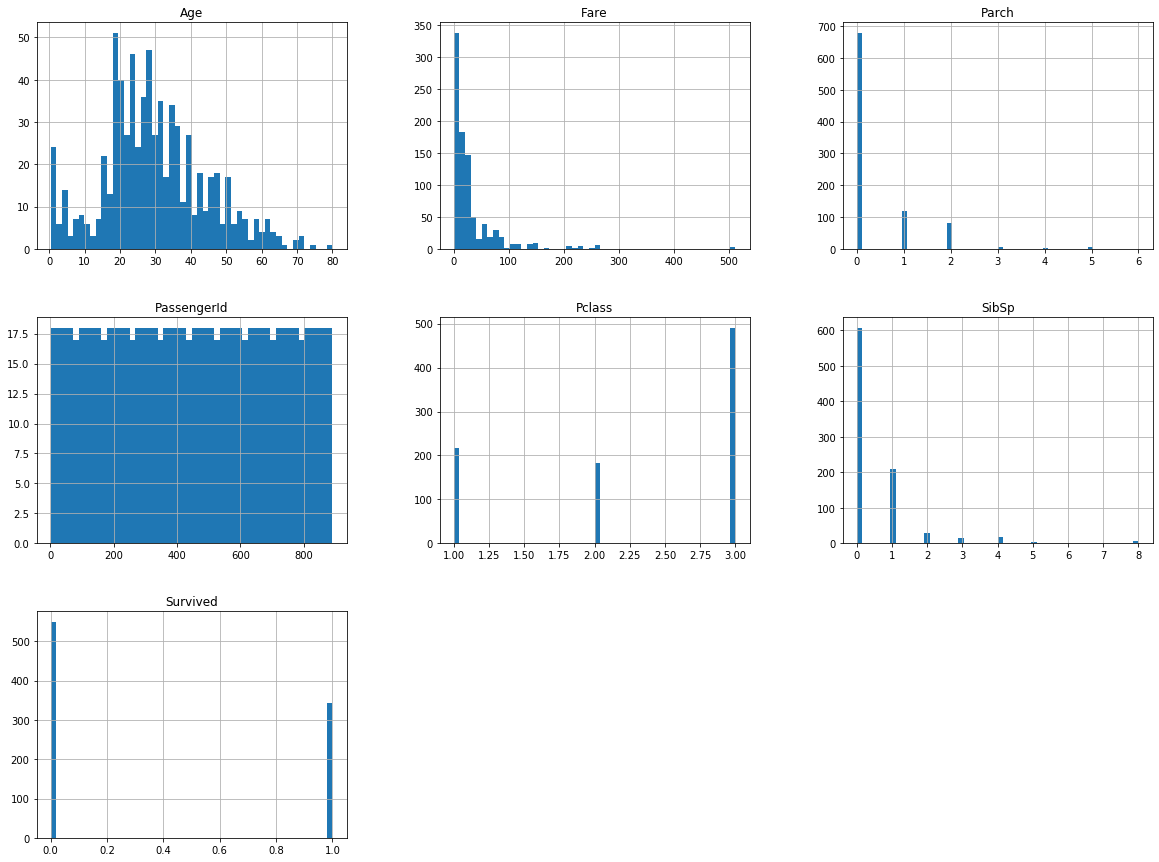

In [54]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [55]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

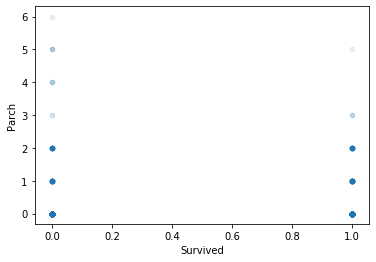

In [56]:
train_data.plot(kind='scatter', x='Survived', y='Parch', alpha=0.1)

In [71]:
corr_matrix = train_data_tr.corr()

In [72]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked_S    -0.155660
Pclass        -0.338481
Sex_male      -0.543351
Name: Survived, dtype: float64

In [60]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
#train_data.Fare.nan()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
X_test.dropna(subset=["Fare"])
#housing.dropna(subset=["total_bedrooms"])

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,0,0,7.8292,0,1
1,3,1,0,7.0000,1,0
2,2,0,0,9.6875,0,1
3,3,0,0,8.6625,0,1
4,3,1,1,12.2875,1,0
...,...,...,...,...,...,...
413,3,0,0,8.0500,0,1
414,1,0,0,108.9000,1,0
415,3,0,0,7.2500,0,1
416,3,0,0,8.0500,0,1


In [51]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
median = X_test["Fare"].median()
X_test["Fare"].fillna(median, inplace=True)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

In [52]:
predictions = model.predict(X)
predictions.shape

(891,)

In [53]:
rfc_mse = mean_squared_error(y, predictions)
rfc_rmse = np.sqrt(rfc_mse)
rfc_rmse, rfc_mse

(0.421104314862138, 0.17732884399551066)

### K-fold cross-validation feature 

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y,
scoring="neg_mean_squared_error", cv=10)
RandomF_rmse_scores = np.sqrt(-scores)

In [56]:
display_scores(RandomF_rmse_scores)

Scores: [0.4472136  0.43704832 0.47404546 0.38218767 0.38218767 0.46204236
 0.43704832 0.48575205 0.41053541 0.46204236]
Mean: 0.4380103238381731
Standard deviation: 0.03436079272000656


In [63]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)
predictions = forest_reg.predict(X)
scores = cross_val_score(forest_reg, X, y,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [0.41279461 0.41240148 0.44660385 0.38658869 0.3128246  0.33119943
 0.402554   0.38340828 0.34664847 0.37063585]
Mean: 0.3805659270906063
Standard deviation: 0.03900764698994346


In [65]:
forest_rmse = mean_squared_error(y, predictions)
forest_rmse

0.06330433972222024

NOTE: However, note that the score on the training set is
still much lower than on the validation sets, meaning that the model is still overfitting the training set.

In [66]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X, y)
predictions = logit.predict(X)
scores = cross_val_score(logit, X, y,
scoring="neg_mean_squared_error", cv=10)
logit_rmse_scores = np.sqrt(-scores)
display_scores(logit_rmse_scores)

Scores: [0.43461349 0.46204236 0.47404546 0.41053541 0.46204236 0.47404546
 0.47404546 0.47404546 0.41053541 0.46204236]
Mean: 0.45379932652905686
Standard deviation: 0.02440306474329792


/home/pinkmonkey/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pinkmonkey/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [67]:
logit_rmse = mean_squared_error(y, predictions)
logit_rmse

0.20426487093153758

### Feature Scaling

I can split my training set to train and val sets and check perfomance